# Social Services

The submetric that is being measured is the number of social services in a neighborhood. In this analysis, I used the BigBurgh Social Services Listing dataset and the City of Pittsburgh Neighborhood Population 2020 dataset. I measured the number of social services in each neighborhood, then divided it by the population of the neighborhood. A good neighborhood should have enough social services to support its population. Doing this also serves to balance out the rankings since more often than not, larger neighborhoods will have more services than smaller neighborhoods.

In [1]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import fpsnippets

In [2]:
social = pd.read_csv("socialServices.csv")
pop = pd.read_csv("neighborhood_population.csv")

All libraries have been imported and datasets have been read. Here, I'm importing a shapefile so I can make a map that is color coded based on the amount of social services in each neighborhood.

<Axes: >

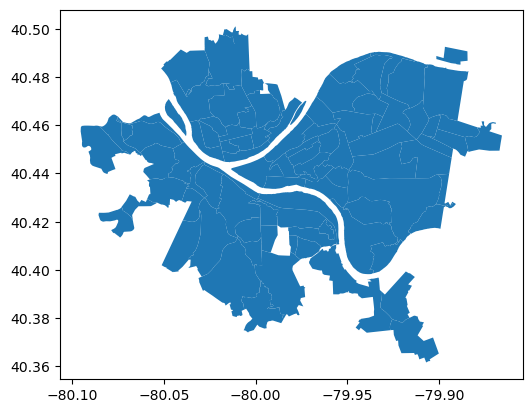

In [3]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#neighborhoods.head(10)
neighborhoods.plot()

I changed the names of the neighborhoods in the social services dataset. Some of the names in the dataset didn't match up with the names in the shapefile (for example, Downtown being called the Central Business District) and thus wouldn't be mapped.

In [4]:
latitude = social['latitude']
longitude = social['longitude']
test = social['neighborhood']
index = 0
while index < social['neighborhood'].count():
    #print(latitude[index])
    #print(longitude[index])
    townName = fpsnippets.geo_to_neighborhood(float(latitude[index]), float(longitude[index]))
    if townName != 'None':
        social.loc[social['_id'] == index + 1, "neighborhood"] = townName
    index = index + 1

Here, I'm manually replacing the names of some of the data because they didn't have entries for latitude, longitude, or an address I could use.

In [5]:
social = social.replace(["Downtown", "Uptown"], ["Central Business District", "Bluff"])
servicesNeighborhoods = social.groupby("neighborhood").count()
#print(servicesNeighborhoods)

,hood,_id,geometry
70,Marshall-Shadeland,1.0,"MULTIPOLYGON (((-80.02568 40.48276, -80.02498 ..."
71,Lincoln Place,NaN,"POLYGON ((-79.91046 40.37847, -79.91042 40.378..."
72,Overbrook,NaN,"POLYGON ((-79.99633 40.39458, -79.9963 40.3944..."
73,Homewood South,2.0,"POLYGON ((-79.88666 40.45521, -79.88651 40.455..."
74,Homewood North,NaN,"POLYGON ((-79.89446 40.46255, -79.89446 40.462..."
75,Homewood West,NaN,"POLYGON ((-79.90226 40.45563, -79.90227 40.455..."
76,Oakwood,NaN,"POLYGON ((-80.06442 40.42875, -80.06322 40.427..."
77,East Liberty,7.0,"POLYGON ((-79.91581 40.46088, -79.9158 40.4608..."
78,East Carnegie,NaN,"POLYGON ((-80.07255 40.42533, -80.07245 40.424..."
79,New Homestead,NaN,"POLYGON ((-79.91815 40.39936, -79.91621 40.398..."


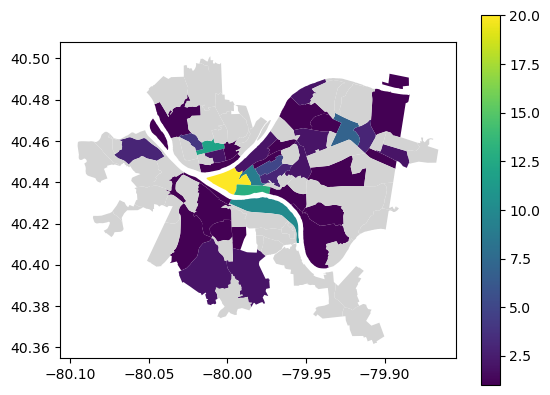

In [6]:
socialMap = neighborhoods.merge(servicesNeighborhoods, how = "left", left_on = "hood", right_on = "neighborhood")
socialMap.plot(column="_id", legend = True, missing_kwds = {'color':'lightgrey'})
socialMap[['hood', '_id', 'geometry']].tail(20)

In this color coded map, it is clear that, in terms of numbers alone, the Central Business District has the most social services. Next, I made bar graphs representing the number of services in each neighborhood.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, 'Central Oakland'),
  Text(1, 0, 'North Oakland'),
  Text(2, 0, 'West Oakland'),
  Text(3, 0, 'Crawford-Roberts'),
  Text(4, 0, 'Strip District'),
  Text(5, 0, 'Central Business District'),
  Text(6, 0, 'Spring Hill-City View'),
  Text(7, 0, 'Perry South'),
  Text(8, 0, 'Summer Hill'),
  Text(9, 0, 'Northview Heights'),
  Text(10, 0, 'Westwood'),
  Text(11, 0, 'Beltzhoover'),
  Text(12, 0, 'Central Lawrenceville'),
  Text(13, 0, 'South Side Flats'),
  Text(14, 0, 'Allentown'),
  Text(15, 0, 'South Side Slopes'),
  Text(16, 0, 'Bluff'),
  Text(17, 0, 'Fineview'),
  Text(1

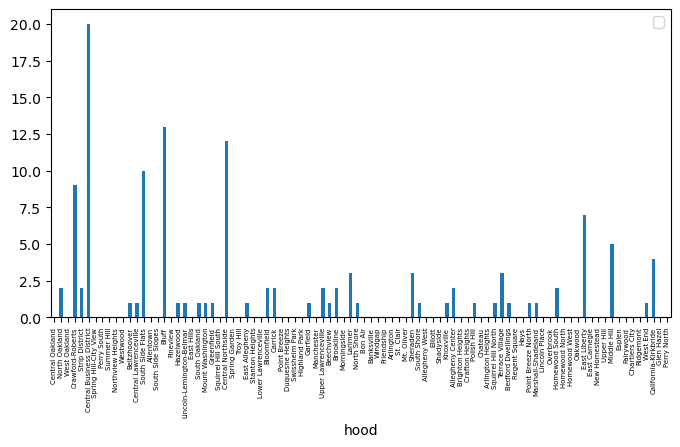

In [7]:
socialMap.plot.bar(x = "hood", y = "_id", figsize=(8,4))
plt.xticks(size = 5)

A couple of the names, like the Central Business District, is listed as "Central Business District (Downtown)", which prevents it from merging correctly with other data and providing a population. Without this data, the neighborhood is eliminated completely from the rest of the analysis since it only returns NaN. So, I replaced the names with the ones they had in the dataframe I was merging the population data with.

In [8]:
pop = pop.replace(["Arlington - Arlington Heights (Combined)", "Central Business District (Downtown)"], ["Arlington Heights", "Central Business District"])
population = pop[["Neighborhood", "2020_Total_Population"]]
#print(population['Neighborhood'].head(20))

In [9]:
socialMap2 = socialMap.merge(population, how = 'left', left_on = 'hood', right_on = 'Neighborhood')
socialMap2['_id'] = socialMap2['_id'].fillna(0)

Calculating the service per person and normalizing the result over a range of 1-100. This gives us a standardized amount of points to add up in our final analysis.

In [10]:
#normalize data
socialMap2['servicePerPerson'] = socialMap2['_id']/socialMap2['2020_Total_Population']

Normalizing with z score:

                    hood  normalizedZ
53           South Shore    99.985485
87  California-Kirkbride    77.576951
86              West End    73.885573
25     Central Northside    69.395733
3       Crawford-Roberts    68.761720


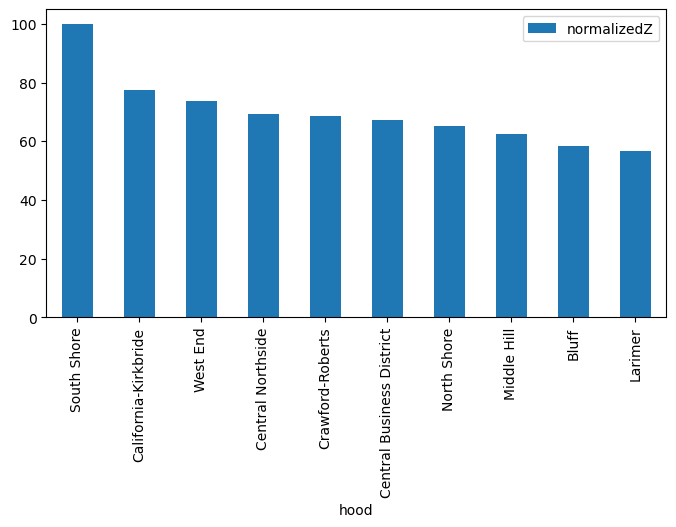

In [11]:
socialMean = socialMap2['servicePerPerson'].mean()
socialStDev = socialMap2['servicePerPerson'].std()
socialMap2['zScore'] = (socialMap2['servicePerPerson'] - socialMean)/socialStDev
socialMap2['normalizedZ'] = 100 / (1 + np.exp(-socialMap2['zScore']))
socialMap2.sort_values(by = 'normalizedZ', ascending = False, inplace = True)
socialMap2.iloc[0:10].plot(kind = 'bar', x = "hood", y = "normalizedZ", figsize=(8,4))
print(socialMap2[['hood', 'normalizedZ']].head())

# Conclusion

Based on the data, the best neightborhoods in terms of number of social services over a population, the best 3 neighborhoods are South Shore, California-Kirkbride, and West End. In comparison to my favorite neighborhood, the results are different. My favorite Pittsburgh neighborhood is Shadyside because of all of the specialty shops in the neighborhood. 